# Horizon Prediction


## Exploratory Data Analysis 
Explore the dataset: logs, wells, picks
Make Steps towards building a training set

In [342]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# load wells
df_wells= pd.read_csv('SPE_006_originalData/OilSandsDB/Wells.txt',delimiter='\t')
print(df_wells.count())
df_wells.head()

SitID        2193
UWI (AGS)    2193
UWI          2193
dtype: int64


,SitID,UWI (AGS),UWI
0,102496,0674010812000,00/12-08-067-01W4/0
1,102497,0674020807000,00/07-08-067-02W4/0
2,102498,0674021109000,00/09-11-067-02W4/0
3,102500,0674022910000,00/10-29-067-02W4/0
4,102501,0674023406000,00/06-34-067-02W4/0


In [4]:
# load picks
df_picks = pd.read_csv('SPE_006_originalData/OilSandsDB/Picks.txt',delimiter='\t')
print(df_picks.count())
df_picks.head()

SitID      30702
HorID      30702
Pick       30702
Quality    30702
dtype: int64


,SitID,HorID,Pick,Quality
0,102496,1000,321,1
1,102496,2000,,-1
2,102496,3000,,-1
3,102496,4000,,-1
4,102496,5000,438,2


In [5]:
df_picks[df_picks['SitID']==102496]

,SitID,HorID,Pick,Quality
0,102496,1000,321,1
1,102496,2000,,-1
2,102496,3000,,-1
3,102496,4000,,-1
4,102496,5000,438,2
5,102496,6000,,-1
6,102496,7000,458,3
7,102496,9000,468,3
8,102496,9500,468,3
9,102496,10000,471.5,3


In [6]:
%%bash
ls SPE_006_originalData/OilSandsDB

INTELLOG.TXT
LITHOLOGY_DIC.TXT
LITHOLOGY_DIC.xls
Logs
PICKS.TXT
PICKS.xls
PICKS_DIC.TXT
PICKS_DIC.xls
ReadMe.doc
WELLS.TXT
WELLS.xls
~$ReadMe.doc


In [7]:
columns = ['SitID','Depth','LithID','W_Tar','SW','VSH','PHI','RW']
df_logs = pd.read_csv('SPE_006_originalData/OilSandsDB/INTELLOG.TXT',
                      delimiter='\t', header=None,
                     names=columns)
print(df_logs.count())
df_logs.head()

SitID     579846
Depth     579846
LithID    579846
W_Tar     579846
SW        579846
VSH       579846
PHI       579846
RW        579846
dtype: int64


,SitID,Depth,LithID,W_Tar,SW,VSH,PHI,RW
0,102496,437.00,5,0.0,1.0,1.000,0.000,1.0540
1,102496,437.25,5,0.0,1.0,0.956,0.016,1.0540
2,102496,437.50,5,0.0,1.0,0.776,0.083,1.0540
3,102496,437.75,4,0.0,1.0,0.583,0.154,1.0540
4,102496,438.00,2,0.0,1.0,0.383,0.228,1.0540


In [8]:
%%bash
ls SPE_006_originalData/OilSandsDB/Logs

00-01-01-073-05W5-0.LAS
00-01-01-095-19W4-0.LAS
00-01-03-085-15W4-0.LAS
00-01-04-075-23W4-0.LAS
00-01-05-085-15W4-0.LAS
00-01-08-080-21W4-0.LAS
00-01-09-080-13W4-0.LAS
00-01-10-078-26W4-0.LAS
00-01-11-082-23W4-0.LAS
00-01-12-079-14W4-0.LAS
00-01-21-084-17W4-0.LAS
00-01-24-075-24W4-0.LAS
00-01-25-083-02W4-0.LAS
00-01-26-068-08W4-0.LAS
00-01-27-079-23W4-0.LAS
00-01-27-080-14W4-0.LAS
00-01-28-078-02W4-0.LAS
00-01-29-096-19W4-0.LAS
00-01-32-080-22W4-0.LAS
00-02-01-073-19W4-0.LAS
00-02-01-074-05W5-0.LAS
00-02-02-083-11W4-0.LAS
00-02-03-071-04W5-0.LAS
00-02-05-074-04W5-0.LAS
00-02-05-076-26W4-0.LAS
00-02-06-074-04W5-0.LAS
00-02-07-076-13W4-0.LAS
00-02-08-078-02W5-0.LAS
00-02-14-077-04W4-0.LAS
00-02-15-076-18W4-0.LAS
00-02-17-079-03W4-0.LAS
00-02-18-077-13W4-0.LAS
00-02-22-071-22W4-0.LAS
00-02-22-091-19W4-0.LAS
00-02-25-077-10W4-0.LAS
00-02-26-072-13W4-0.LAS
00-02-26-073-05W5-0.LAS
00-02-26-076-04W4-0.LAS
00-02-27-076-14W4-0.LAS
00-02-29-067-06W4-0.LAS
00-02-29-073-15W4-0.LAS
00-02-29-080-13W

## Build Training Set

In [142]:
import pandas as pd
picks_dic = pd.read_csv('./SPE_006_originalData/OilSandsDB/PICKS_DIC.TXT',delimiter='\t')
picks = pd.read_csv('./SPE_006_originalData/OilSandsDB/PICKS.TXT',delimiter='\t')
wells = pd.read_csv('./SPE_006_originalData/OilSandsDB/WELLS.TXT',delimiter='\t')
#picks_new=picks[picks['HorID']==13000]
df_picks=pd.merge(wells, picks, on='SitID')
df_picks.head()

,SitID,UWI (AGS),UWI,HorID,Pick,Quality
0,102496,0674010812000,00/12-08-067-01W4/0,1000,321,1
1,102496,0674010812000,00/12-08-067-01W4/0,2000,,-1
2,102496,0674010812000,00/12-08-067-01W4/0,3000,,-1
3,102496,0674010812000,00/12-08-067-01W4/0,4000,,-1
4,102496,0674010812000,00/12-08-067-01W4/0,5000,438,2


In [143]:
df_picks = pd.merge(df_picks, picks_dic, on='HorID')
df_picks = df_picks.rename(columns={'Descriptopn':'Horizon'})
df_picks.head()

,SitID,UWI (AGS),UWI,HorID,Pick,Quality,Horizon
0,102496,0674010812000,00/12-08-067-01W4/0,1000,321,1,mannville
1,102497,0674020807000,00/07-08-067-02W4/0,1000,354,1,mannville
2,102498,0674021109000,00/09-11-067-02W4/0,1000,317.5,1,mannville
3,102500,0674022910000,00/10-29-067-02W4/0,1000,384,1,mannville
4,102501,0674023406000,00/06-34-067-02W4/0,1000,367.5,1,mannville


In [144]:
print(df_picks.dtypes)
# convert Picks to floats
df_picks['Pick'] = pd.to_numeric(df_picks['Pick'], errors='coerce')
print(df_picks.dtypes)

SitID         int64
UWI (AGS)    object
UWI          object
HorID         int64
Pick         object
Quality       int64
Horizon      object
dtype: object
SitID          int64
UWI (AGS)     object
UWI           object
HorID          int64
Pick         float64
Quality        int64
Horizon       object
dtype: object


In [145]:
df.count()

CALI         146890
COND            842
DELT          17132
DEPT         410636
DPHI         385070
GR           410634
ILD          409865
NPHI         394444
PHID           1328
PHIN            501
RHOB          21551
UWI          410636
SitID          2776
UWI (AGS)      2776
HorID        237127
Pick           2776
Quality        2776
dtype: int64

In [108]:
import glob
import lasio

def load_logs(path='SPE_006_originalData/OilSandsDB/Logs/*.LAS', limit=500):
    count=0
    for file in glob.glob(path):
        if count > limit:
            break
        count+=1
        
        # load .las file
        l_df = lasio.read(file).df()
        #print(file)
        
        # format UWI
        str_uwi= file[-23:-4].replace("-", "/",1)[:17]+file[-6:-4].replace("-", "/",1)
        #print(str_uwi)
        l_df = l_df.reset_index()
        l_df['UWI'] = str_uwi
        
        # append results to a dataframe
        if count == 1:
            data_df=l_df
        else:
            data_df=pd.concat([data_df, l_df])
        
    return data_df

In [109]:
# load logs
df_logs = load_logs('SPE_006_originalData/OilSandsDB/Logs/*.LAS', 500)
df_logs.count()

CALI    146657
COND       842
DELT     17132
DEPT    409925
DPHI    384362
GR      409923
ILD     409154
NPHI    393733
PHID      1328
PHIN       501
RHOB     21508
UWI     409925
dtype: int64

In [112]:
len(df_logs['UWI'].unique())

501

In [113]:
df_picks[df_picks['UWI'] == '00/01-01-073-05W5/0'].head()

,SitID,UWI (AGS),UWI,HorID,Pick,Quality
8372,142218,0735050101000,00/01-01-073-05W5/0,1000,393.0,1
8373,142218,0735050101000,00/01-01-073-05W5/0,2000,NaN,-1
8374,142218,0735050101000,00/01-01-073-05W5/0,3000,NaN,-1
8375,142218,0735050101000,00/01-01-073-05W5/0,4000,549.0,1
8376,142218,0735050101000,00/01-01-073-05W5/0,5000,584.0,1


In [114]:
df_logs[df_logs['UWI'] == '00/01-01-073-05W5/0'].head()

,CALI,COND,DELT,DEPT,DPHI,GR,ILD,NPHI,PHID,PHIN,RHOB,UWI
0,238.379,NaN,NaN,390.00,0.199,82.478,2.923,0.457,NaN,NaN,NaN,00/01-01-073-05W5/0
1,238.331,NaN,NaN,390.25,0.208,86.413,2.925,0.456,NaN,NaN,NaN,00/01-01-073-05W5/0
2,238.069,NaN,NaN,390.50,0.246,90.229,2.917,0.452,NaN,NaN,NaN,00/01-01-073-05W5/0
3,238.752,NaN,NaN,390.75,0.266,90.944,2.898,0.475,NaN,NaN,NaN,00/01-01-073-05W5/0
4,239.724,NaN,NaN,391.00,0.287,88.866,2.890,0.484,NaN,NaN,NaN,00/01-01-073-05W5/0


In [360]:
# join logs and picks
df = pd.merge(df_logs, df_picks, right_on=['UWI','Pick'], left_on=['UWI','DEPT'], how='left')
df.count()

CALI         146890
COND            842
DELT          17132
DEPT         410636
DPHI         385070
GR           410634
ILD          409865
NPHI         394444
PHID           1328
PHIN            501
RHOB          21551
UWI          410636
SitID          2776
UWI (AGS)      2776
HorID          2776
Pick           2776
Quality        2776
Horizon        2776
dtype: int64

In [361]:
# forward fill picks
df['HorID'] = df.groupby('UWI')['HorID'].ffill()
df['Horizon'] = df.groupby('UWI')['Horizon'].ffill()
df.count()

CALI         146890
COND            842
DELT          17132
DEPT         410636
DPHI         385070
GR           410634
ILD          409865
NPHI         394444
PHID           1328
PHIN            501
RHOB          21551
UWI          410636
SitID          2776
UWI (AGS)      2776
HorID        237127
Pick           2776
Quality        2776
Horizon      237127
dtype: int64

In [148]:
df.sort_values(['UWI','DEPT']).sample(10)

,CALI,COND,DELT,DEPT,DPHI,GR,ILD,NPHI,PHID,PHIN,RHOB,UWI,SitID,UWI (AGS),HorID,Pick,Quality,Horizon
63829,288.319,NaN,NaN,451.000,0.170,72.262,7.382,0.335,NaN,NaN,NaN,00/03-25-083-02W5/0,NaN,NaN,4000.0,NaN,NaN,t41
215031,213.850,NaN,NaN,245.680,0.225,90.737,7.539,0.477,NaN,NaN,NaN,00/06-11-087-22W4/0,NaN,NaN,NaN,NaN,NaN,NaN
369066,8.939,NaN,NaN,774.081,0.260,41.102,71.980,0.438,NaN,NaN,NaN,00/06-35-092-19W4/0,NaN,NaN,NaN,NaN,NaN,NaN
333080,169.466,NaN,NaN,456.500,0.333,43.843,2.205,0.389,NaN,NaN,NaN,00/06-31-070-23W4/0,NaN,NaN,1000.0,NaN,NaN,mannville
110653,188.876,NaN,NaN,432.500,0.265,61.405,3.193,0.326,NaN,NaN,NaN,00/05-07-071-01W5/0,NaN,NaN,1000.0,NaN,NaN,mannville
404448,NaN,NaN,NaN,366.000,0.326,32.975,1.681,0.368,NaN,NaN,NaN,00/07-06-079-03W4/0,NaN,NaN,13000.0,NaN,NaN,mcmurray
148275,185.506,NaN,NaN,146.500,0.212,98.162,8.164,0.401,NaN,NaN,NaN,00/05-36-092-20W4/0,NaN,NaN,NaN,NaN,NaN,NaN
260346,219.130,NaN,NaN,213.250,0.305,18.438,32.525,0.310,NaN,NaN,NaN,00/06-20-081-24W4/0,NaN,NaN,NaN,NaN,NaN,NaN
317874,155.621,NaN,NaN,513.336,0.179,98.409,6.082,0.430,NaN,NaN,NaN,00/06-29-071-22W4/0,NaN,NaN,NaN,NaN,NaN,NaN
78637,NaN,NaN,NaN,386.500,0.185,107.949,6.805,0.438,NaN,NaN,NaN,00/04-11-070-10W4/0,NaN,NaN,1000.0,NaN,NaN,mannville


In [286]:
horizon_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D',
        '#a3f4c7','#0ac353','#42c02d','#ffb2d8','#ff7faa']
                

horizon_labels = picks_dic['Descriptopn'].values


In [343]:
def make_log_plot(logs):
    #make sure logs are sorted by depth
    logs['Horizon'].unique()
    logs = logs.sort_values('DEPT', ascending=True)    
    
    ztop=logs.DEPT.min(); zbot=logs.DEPT.max()
    
    cluster=np.repeat(np.expand_dims(logs['HorID'].values, 1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.DEPT, '-g')
    ax[1].plot(logs.ILD, logs.DEPT, '-')
    ax[2].plot(logs.DPHI, logs.DEPT, '-', color='0.5')
    ax[3].plot(logs.CALI, logs.DEPT, '-', color='r')
    ax[4].plot(logs.NPHI, logs.DEPT, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto', cmap='tab20')
    
    #divider = make_axes_locatable(ax[5])
    #cax = divider.append_axes("right", size="20%", pad=0.05)
    #cbar=plt.colorbar(im, cax=cax)
    #cbar.set_label((6*' ').join(logs['Horizon'].unique()))
    #cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD")
    ax[1].set_xlim(logs.ILD.min(),logs.ILD.max())
    ax[2].set_xlabel("DPHI")
    ax[2].set_xlim(logs.DPHI.min(),logs.DPHI.max())
    ax[3].set_xlabel("CALI")
    ax[3].set_xlim(logs.CALI.min(),logs.CALI.max())
    ax[4].set_xlabel("NPHI")
    ax[4].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[5].set_xlabel('Horizon')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['UWI'], fontsize=14, y=0.94)

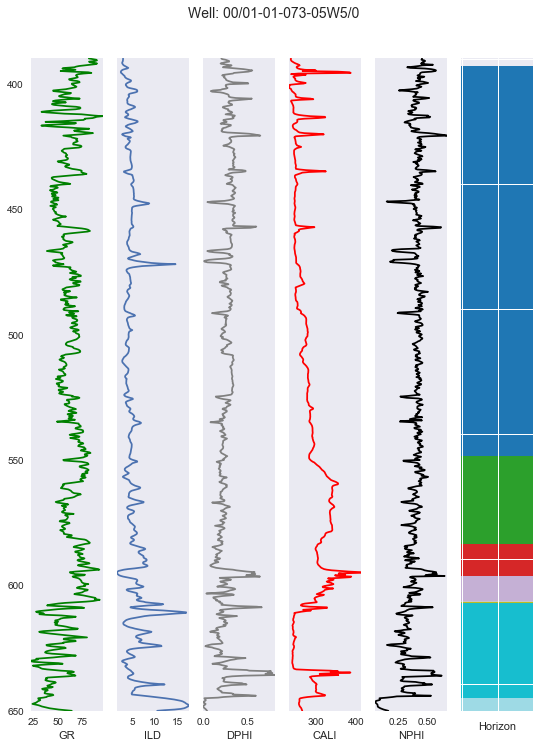

In [344]:
#df[df.UWI == '00/01-01-073-05W5/0']
logs = df[df.UWI == '00/01-01-073-05W5/0']
#logs.loc[:,'Horizon'] = 
logs['Horizon'].dropna()
make_log_plot(logs)
#picks_dic['Descriptopn'].values

In [329]:
logs.head()

,CALI,COND,DELT,DEPT,DPHI,GR,ILD,NPHI,PHID,PHIN,RHOB,UWI,SitID,UWI (AGS),HorID,Pick,Quality,Horizon
0,238.379,NaN,NaN,390.00,0.199,82.478,2.923,0.457,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,NaN,NaN,NaN,NaN
1,238.331,NaN,NaN,390.25,0.208,86.413,2.925,0.456,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,NaN,NaN,NaN,NaN
2,238.069,NaN,NaN,390.50,0.246,90.229,2.917,0.452,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,NaN,NaN,NaN,NaN
3,238.752,NaN,NaN,390.75,0.266,90.944,2.898,0.475,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,NaN,NaN,NaN,NaN
4,239.724,NaN,NaN,391.00,0.287,88.866,2.890,0.484,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
#df[['CALI','DEPT','DPHI','GR','ILD','NPHI','Horizon']].head()
df[~df.Horizon.isnull()].head()

,CALI,COND,DELT,DEPT,DPHI,GR,ILD,NPHI,PHID,PHIN,RHOB,UWI,SitID,UWI (AGS),HorID,Pick,Quality,Horizon
12,256.370,NaN,NaN,393.00,0.299,72.249,3.338,0.429,NaN,NaN,NaN,00/01-01-073-05W5/0,142218.0,0735050101000,1000.0,393.0,1.0,mannville
13,253.120,NaN,NaN,393.25,0.241,69.179,3.580,0.385,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,1000.0,NaN,NaN,mannville
14,252.442,NaN,NaN,393.50,0.216,67.349,3.870,0.329,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,1000.0,NaN,NaN,mannville
15,253.526,NaN,NaN,393.75,0.293,58.390,4.097,0.355,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,1000.0,NaN,NaN,mannville
16,256.377,NaN,NaN,394.00,0.374,54.888,3.848,0.481,NaN,NaN,NaN,00/01-01-073-05W5/0,NaN,NaN,1000.0,NaN,NaN,mannville


C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


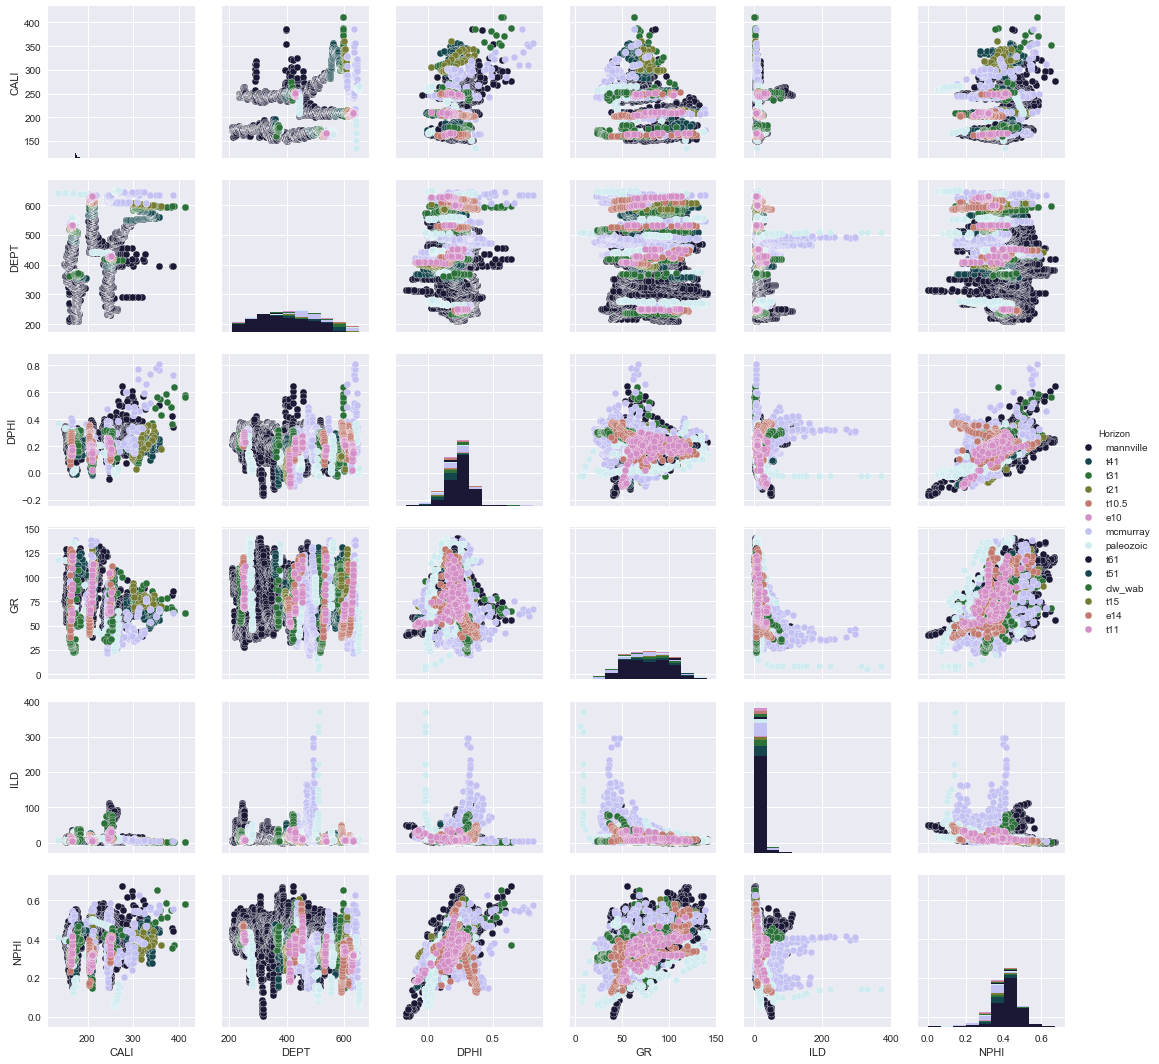

In [349]:
# Plot

#save plot display settings to change back to when done plotting with seaborn
#inline_rc = dict(mpl.rcParams)

import seaborn as sns
sns.set()
sns.pairplot(df[['CALI','DEPT','DPHI','GR','ILD','NPHI','Horizon']].head(10000), dropna=True,             
             hue='Horizon', palette=sns.color_palette("cubehelix", 8))

#switch back to default matplotlib plot style
#mpl.rcParams.update(inline_rc)



## Train Classifier

In [362]:
features = ['CALI','DEPT','DPHI','GR','ILD','NPHI']
label = 'Horizon'
df = df[features + [label]].dropna()
train_X = df[features]
train_y = df[label]

In [363]:
train_X.shape

(79428, 6)

In [364]:
train_y.shape

(79428,)

In [365]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_X)
scaled_features = scaler.transform(train_X)

In [374]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, train_y, test_size=0.3, random_state=42)

In [375]:
from sklearn import svm

clf = svm.SVC()

In [376]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [377]:
predicted_labels = clf.predict(X_test)

In [378]:
from sklearn import metrics

report = metrics.classification_report(y_test, predicted_labels)
print(report)

             precision    recall  f1-score   support

    clw_wab       0.73      0.58      0.65       404
        e10       0.00      0.00      0.00        15
        e14       0.61      0.20      0.31       496
  mannville       0.80      0.97      0.88     14645
   mcmurray       0.65      0.52      0.57      2086
  paleozoic       0.81      0.56      0.66       627
      t10.5       0.79      0.24      0.37        78
        t11       0.52      0.12      0.20       594
        t15       0.00      0.00      0.00        29
        t21       0.52      0.23      0.31       536
        t31       0.38      0.17      0.23      1263
        t41       0.47      0.41      0.44      2474
        t51       0.00      0.00      0.00        78
        t61       0.71      0.62      0.66       504

avg / total       0.71      0.74      0.71     23829



C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [379]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, predicted_labels)
print(conf)

[[  235     0    10    80    21     2     3    13     0     0     0    28
      0    12]
 [    0     0     0     5     6     0     0     0     0     1     0     3
      0     0]
 [   17     0   101   163    55     1     0     2     0    27    31    99
      0     0]
 [    3     0     9 14170   136    13     0     9     0     3    27   239
      0    36]
 [   15     0    17   712  1077    28     0    11     0    12    42   161
      0    11]
 [    2     0    10    75    82   351     0    13     0     7    29    50
      0     8]
 [   10     0     0    16    15     0    19     5     0     0     0    11
      0     2]
 [   25     0     6   215    85    13     2    73     0     8    50   108
      0     9]
 [    1     0     1    14     3     0     0     0     0     2     3     5
      0     0]
 [   13     0     7   183    20     5     0     4     0   121    84    99
      0     0]
 [    2     0     1   629    61     9     0     3     0    27   212   314
      0     5]
 [    0     0     3  

## Benchmark Different Algos

In [385]:
# import a dozen different algos from SKlearn

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

import json
import os
import random

In [386]:
# tunning
# just a trim function

def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

In [387]:
# define our benchmark function

def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))
#         print("top 10 keywords per class:")
#         for i, label in enumerate(target_names):
#             top10 = np.argsort(clf.coef_[i])[-10:]
#             print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    
    print("classification report:")    
    print(metrics.classification_report(y_test, pred))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [388]:
# start benchmarking different algos

results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (Perceptron(n_iter=50), "Perceptron"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest"),
        (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive")):

    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(loss='l2', penalty=penalty,
                                            dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', LinearSVC(penalty="l1", dual=False, tol=1e-3)),
  ('classification', LinearSVC())
])))

# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.234s
test time:  0.011s
accuracy:   0.623
dimensionality: 6
density: 1.000000

classification report:
             precision    recall  f1-score   support

    clw_wab       0.49      0.17      0.26       404
        e10       0.00      0.00      0.00        15
        e14       0.00      0.00      0.00       496
  mannville       0.65      0.99      0.78     14645
   mcmurray       0.38      0.05      0.08      2086
  paleozoic       0.84      0.07      0.13       627
      t10.5       0.00      0.00      0.00        78
        t11       0.00      0.00      0.00       594
        t15       0.00      0.00      0.00        29
        t21       0.00      0.00      0.00       536
        t31       0.

C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[[   70     0     0   330     4     0     0     0     0     0     0     0
      0     0]
 [    0     0     0    13     1     0     0     0     0     0     0     1
      0     0]
 [    0     0     0   421    21     0     0     0     0     0     0    54
      0     0]
 [   32     0     0 14459    29     3     0     0     0     0     0   122
      0     0]
 [    7     0     0  1839    94     4     0     0     0     0     0   142
      0     0]
 [   12     0     0   413    23    43     0     0     0     0     0   136
      0     0]
 [   11     0     0    64     2     0     0     0     0     0     0     1
      0     0]
 [    4     0     0   480    14     1     0     0     0     0     0    95
      0     0]
 [    0     0     0    24     1     0     0     0     0     0     0     4
      0     0]
 [    7     0     0   371     8     0     0     0     0     0     0   150
      0     0]
 [    0     0     0  1107    13     0     0     0     0     0     0   143
      0     0]
 [    1     0     0  

C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train time: 0.129s
test time:  1.354s
accuracy:   0.839
classification report:
             precision    recall  f1-score   support

    clw_wab       0.74      0.70      0.72       404
        e10       0.00      0.00      0.00        15
        e14       0.59      0.52      0.55       496
  mannville       0.90      0.97      0.93     14645
   mcmurray       0.79      0.71      0.74      2086
  paleozoic       0.79      0.71      0.75       627
      t10.5       0.69      0.32      0.44        78
        t11       0.59      0.47      0.53       594
        t15       0.00      0.00      0.00        29
        t21       0.58      0.38      0.46       536
        t31       0.64      0.55      0.59      1263
        t41       0.73      0.70      0.72      2474
        t51       0.59      0.49      0.54        78
        t61       0.78      0.72      0.75       504

avg / total       0.83      0.84      0.83     23829

confusion matrix:


C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[  283     0     5    26    14     4     6    21     0     2     1    30
      3     9]
 [    0     0     2     2     5     1     0     0     0     0     2     3
      0     0]
 [   11     0   257    56    37     7     0    24     0    30    37    37
      0     0]
 [    6     0    14 14176    91    17     1    26     0     9    78   182
      5    40]
 [   11     0    36   354  1473    36     1    35     0    19    39    78
      0     4]
 [   12     0     9    36    50   448     1    19     0     6    16    28
      0     2]
 [    9     0     2    11    15     1    25     7     0     1     2     4
      0     1]
 [   28     0    29    84    77    15     0   281     0     8    33    34
      1     4]
 [    1     0    10     6     1     0     0     1     0     4     1     5
      0     0]
 [   14     0    41    84    16     9     0    21     0   206    81    64
      0     0]
 [    5     0    13   281    32     6     0    14     0    48   692   167
      4     1]
 [    2     0    20  

C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 2.605s
test time:  0.010s
accuracy:   0.592
dimensionality: 6
density: 1.000000

classification report:
             precision    recall  f1-score   support

    clw_wab       0.31      0.43      0.36       404
        e10       0.00      0.07      0.00        15
        e14       0.05      0.11      0.07       496
  mannville       0.69      0.93      0.79     14645
   mcmurray       0.51      0.03      0.05      2086
  paleozoic       0.00      0.00      0.00       627
      t10.5       0.00      0.00      0.00        78
        t11       0.11      0.06      0.08       594
        t15       0.00      0.00      0.00        29
        t21       0.12      0.04      0.06       536
        t31       0.26      0.01      0.01      1263
        t41       0.13      0.03      0.04      2474
        t51       0.00      0.00      0.00        78
        t61       0.73      0.09      0.16       504

avg / total       0.52      0.59      0.51     23829

confusion matrix:
[[  175     0  

C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.001, verbose=0)
train time: 0.757s
test time:  0.010s
accuracy:   0.628
dimensionality: 6
density: 1.000000

classification report:
             precision    recall  f1-score   support

    clw_wab       0.56      0.28      0.38       404
        e10       0.00      0.00      0.00        15
        e14       0.00      0.00      0.00       496
  mannville       0.66      0.98      0.79     14645
   mcmurray       0.32      0.07      0.11      2086
  paleozoic       0.48      0.28      0.35       627
      t10.5       0.00      0.00      0.00        78
        t11       0.00      0.00      0.00       594
        t15       0.00      0.00      0.00        29
        t21       0.00      0.00      0.00       53

C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


confusion matrix:
[[  115     0     0   280     7     1     0     0     0     0     0     1
      0     0]
 [    0     0     0    11     2     0     0     0     0     0     0     2
      0     0]
 [    0     0     0   395    35     0     0     0     0     0     0    66
      0     0]
 [   46     0     0 14320    63    78     0     0     0     0     0   117
      0    21]
 [    8     0     0  1800   143    26     0     0     0     0     0   107
      0     2]
 [    5     0     0   344    44   176     0     0     0     0     0    46
      0    12]
 [   13     0     0    61     2     0     0     0     0     0     0     2
      0     0]
 [    8     0     0   448    35    20     0     0     0     0     0    83
      0     0]
 [    0     0     0    23     2     0     0     0     0     0     0     4
      0     0]
 [   10     0     0   346    18     7     0     0     0     0     0   155
      0     0]
 [    0     0     0  1050    25    22     0     0     0     0     0   166
      0     0]
 [ 

C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train time: 1.276s
test time:  0.009s
accuracy:   0.628
dimensionality: 6
density: 1.000000

classification report:
             precision    recall  f1-score   support

    clw_wab       0.56      0.28      0.38       404
        e10       0.00      0.00      0.00        15
        e14       0.00      0.00      0.00       496
  mannville       0.66      0.98      0.79     14645
   mcmurray       0.32      0.07      0.11      2086
  paleozoic       0.48      0.28      0.35       627
      t10.5       0.00      0.00      0.00        78
        t11       0.00      0.00      0.00       594
        t15       0.00      0.00      0.00        29
        t21       0.00      0.00      0.00       536
        t31       0.00      0.00      0.00      1263
        t41       0.21      0.08      0.12      2474
        t51       0.00      0.00      0.00        78
        t61       0.36      0.04      0.07       504

avg / total       0.48      0.63      0.52     23829

confusion matrix:


C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[[  115     0     0   280     7     1     0     0     0     0     0     1
      0     0]
 [    0     0     0    11     2     0     0     0     0     0     0     2
      0     0]
 [    0     0     0   395    35     0     0     0     0     0     0    66
      0     0]
 [   46     0     0 14320    63    78     0     0     0     0     0   117
      0    21]
 [    8     0     0  1800   143    26     0     0     0     0     0   107
      0     2]
 [    5     0     0   344    44   176     0     0     0     0     0    46
      0    12]
 [   13     0     0    61     2     0     0     0     0     0     0     2
      0     0]
 [    8     0     0   448    35    20     0     0     0     0     0    83
      0     0]
 [    0     0     0    23     2     0     0     0     0     0     0     4
      0     0]
 [   10     0     0   346    18     7     0     0     0     0     0   155
      0     0]
 [    0     0     0  1050    25    22     0     0     0     0     0   166
      0     0]
 [    2     0     0  

C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 3.506s
test time:  0.009s
accuracy:   0.622
dimensionality: 6
density: 0.428571

classification report:
             precision    recall  f1-score   support

    clw_wab       0.66      0.20      0.30       404
        e10       0.00      0.00      0.00        15
        e14       0.03      0.01      0.01       496
  mannville       0.68      0.96      0.80     14645
   mcmurray       0.18      0.01      0.01      2086
  paleozoic       0.28      0.39      0.33       627
      t10.5       0.00      0.00      0.00        78
        t11       0.05      0.01      0.02       594
        t15       0.00      0.00      0.00        29
        t21       0.00      0.00      0.00       536
        t31       0.00      0.00      0.00      1263
        t41       0.21      0.14      0.17      2474
        t51       0.00      0.00      0.00        78
        t61       0.00      0.00      0.00       504

avg / total       0.47      0.62      0.52     23829

confusion matrix:
[[   80     0  

C:\Users\baa5uo\AppData\Local\Continuum\anaconda3\envs\mlgpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train time: 0.061s
test time:  0.009s
accuracy:   0.428
classification report:
             precision    recall  f1-score   support

    clw_wab       0.19      0.34      0.24       404
        e10       0.00      0.00      0.00        15
        e14       0.07      0.15      0.10       496
  mannville       0.88      0.54      0.67     14645
   mcmurray       0.32      0.22      0.26      2086
  paleozoic       0.21      0.53      0.30       627
      t10.5       0.07      0.35      0.12        78
        t11       0.10      0.10      0.10       594
        t15       0.00      0.00      0.00        29
        t21       0.10      0.31      0.15       536
        t31       0.14      0.27      0.18      1263
        t41       0.30      0.16      0.21      2474
        t51       0.03      0.69      0.06        78
        t61       0.26      0.56      0.35       504

avg / total       0.63      0.43      0.49     23829

confusion matrix:
[[ 138   11    5   25   40    7  100   21    0    0 

ValueError: Input X must be non-negative